# Locally Weighted Regression Algorithm

_Implementing the non-parametric Locally Weighted Regression algorithm in order to fit data points of an appropriate data set and drawing graphs._

In [1]:
# Imports required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Helper Methods

In [2]:
def get_penalty_weights(query_x, X, tau):
    """
    Calculates penalty weights in diagonal matrix used in calculation of predictions
    
    Parameters
    ----------
    query_x: array-like
        query instances
    X: array-like
        features
    tau: float
        A factor, square of which in the form of (-2*τ^2) is to be used as denominator
        while calculating penalty weights for train instances with respect to query instance.
    
    Returns
    --------
    weights: array-like
        Weights with respect to training data to be used for later processing 
        
    """
    
    # Sets number of training instances
    m = X.shape[0]
    
    # Initialising weight matrix with identity matrix
    W = np.mat(np.eye(m))
    
    # calculating weights for query points
    for i in range(m):
        x = X[i]
        W[i, i] = np.exp(
            np.dot((x - query_x), (x - query_x).T) / (-2 * tau * tau)
        )
    
    return W

In [3]:
def predict(X, y, query_x, tau):
    """
    Performs predictions
    
    Parameters
    ----------
    X: array-like
        Training instances
    y: array-like
        Targets
    tau: float
        A factor, square of which in the form of (-2*τ^2) is to be used as denominator
        while calculating penalty weights for train instances with respect to query instance.
    
    Returns
    -------
    theta, prediction: tuple
        Prediction against query instance along with theta for additional reference
    
    """
    
    # Sets number of training instances
    m = X.shape[0]
    
    # Transforms training data into matrix with one additional column of 1s
    X_transformed = np.hstack((np.reshape(X, (-1, 1)), np.ones((m, 1))))
    
    # Transforms query instance into a single row matrix with one additional column of 1
    query_x_transformed = np.mat([query_x, 1])
    
    # Gets weights
    penalty_weights = get_penalty_weights(query_x_transformed, X_transformed, tau)
    
    # Transforms target into 2-D array
    y_transformed = np.reshape(y, (-1, 1))
    
    # calculating parameter theta
    theta = np.linalg.pinv(
        X_transformed.T * (penalty_weights * X_transformed)) * (X_transformed.T * (penalty_weights * y_transformed))
    
    # calculating prediction
    prediction = np.dot(query_x_transformed, theta)
    
    return theta, prediction

## Loading Data Set
_This is a small non-linear data set having just one feature with target. This data set could be useful for learning especially while building a regression model to fit a non-linear data._ 

In [4]:
data = pd.read_csv("./../../Data/curve.csv")

In [5]:
# Initializes train data with targets

X = data.x.values
y = data.y.values

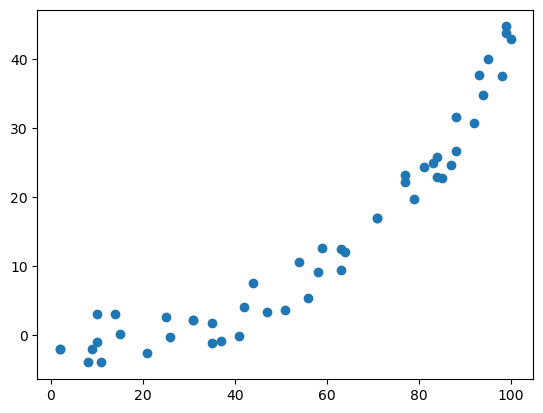

In [6]:
# Plots to visualize how the train data
plt.scatter(X, y)

## Predictions

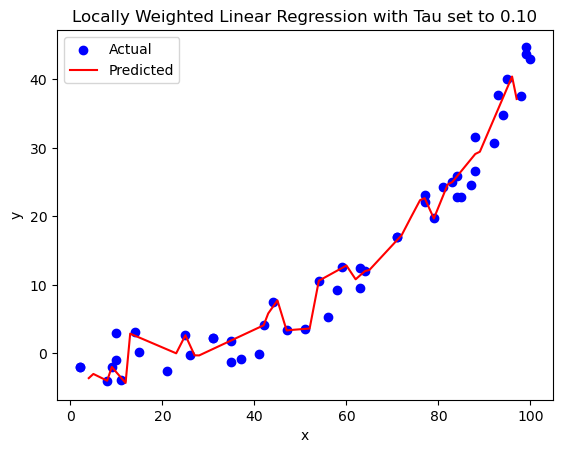

In [7]:
# Vsualizes the predictions the against test data

tau = 0.1

# Generates random test data with the same shape as that of train data.
X_test = np.sort(np.random.randint(1, 100, size=X.shape[0]))

# Initializes a list to hold all predictions
predictions = []

# Iterates test data and performs predictions against query instance
for query_instance in X_test:
    theta, prediction = predict(X, y, query_instance, tau)
    predictions.append(prediction.A[0][0])

# Plots the predictions over query instances

plt.scatter(X, y, color = 'blue', alpha=1.0, label="Actual")
plt.plot(X_test, predictions, color='red', label="Predicted")
# Predictions could also be visualize over scatter plot with the following
# plt.scatter(X_test, predictions, color = 'red', alpha=0.3, label = "Predicted")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Locally Weighted Linear Regression with Tau set to {:.2f}".format(tau))
plt.legend()
plt.show()